In [1]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(palette='deep', style='whitegrid')

from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

Install __[ipywidgets](https://github.com/jupyter-widgets/ipywidgets/blob/master/README.md#install)__ .

Make sure you run 

    jupyter nbextension enable --py --sys-prefix widgetsnbextension
   
in your terminal for the interactive plots to work

# How changing the polynomial degree $M$ corresponds to the bias-variance tradeoff

### What to talk about
* Bias variance tradeoff caused by higher/lower polynomial degrees

<IPython.core.display.Javascript object>


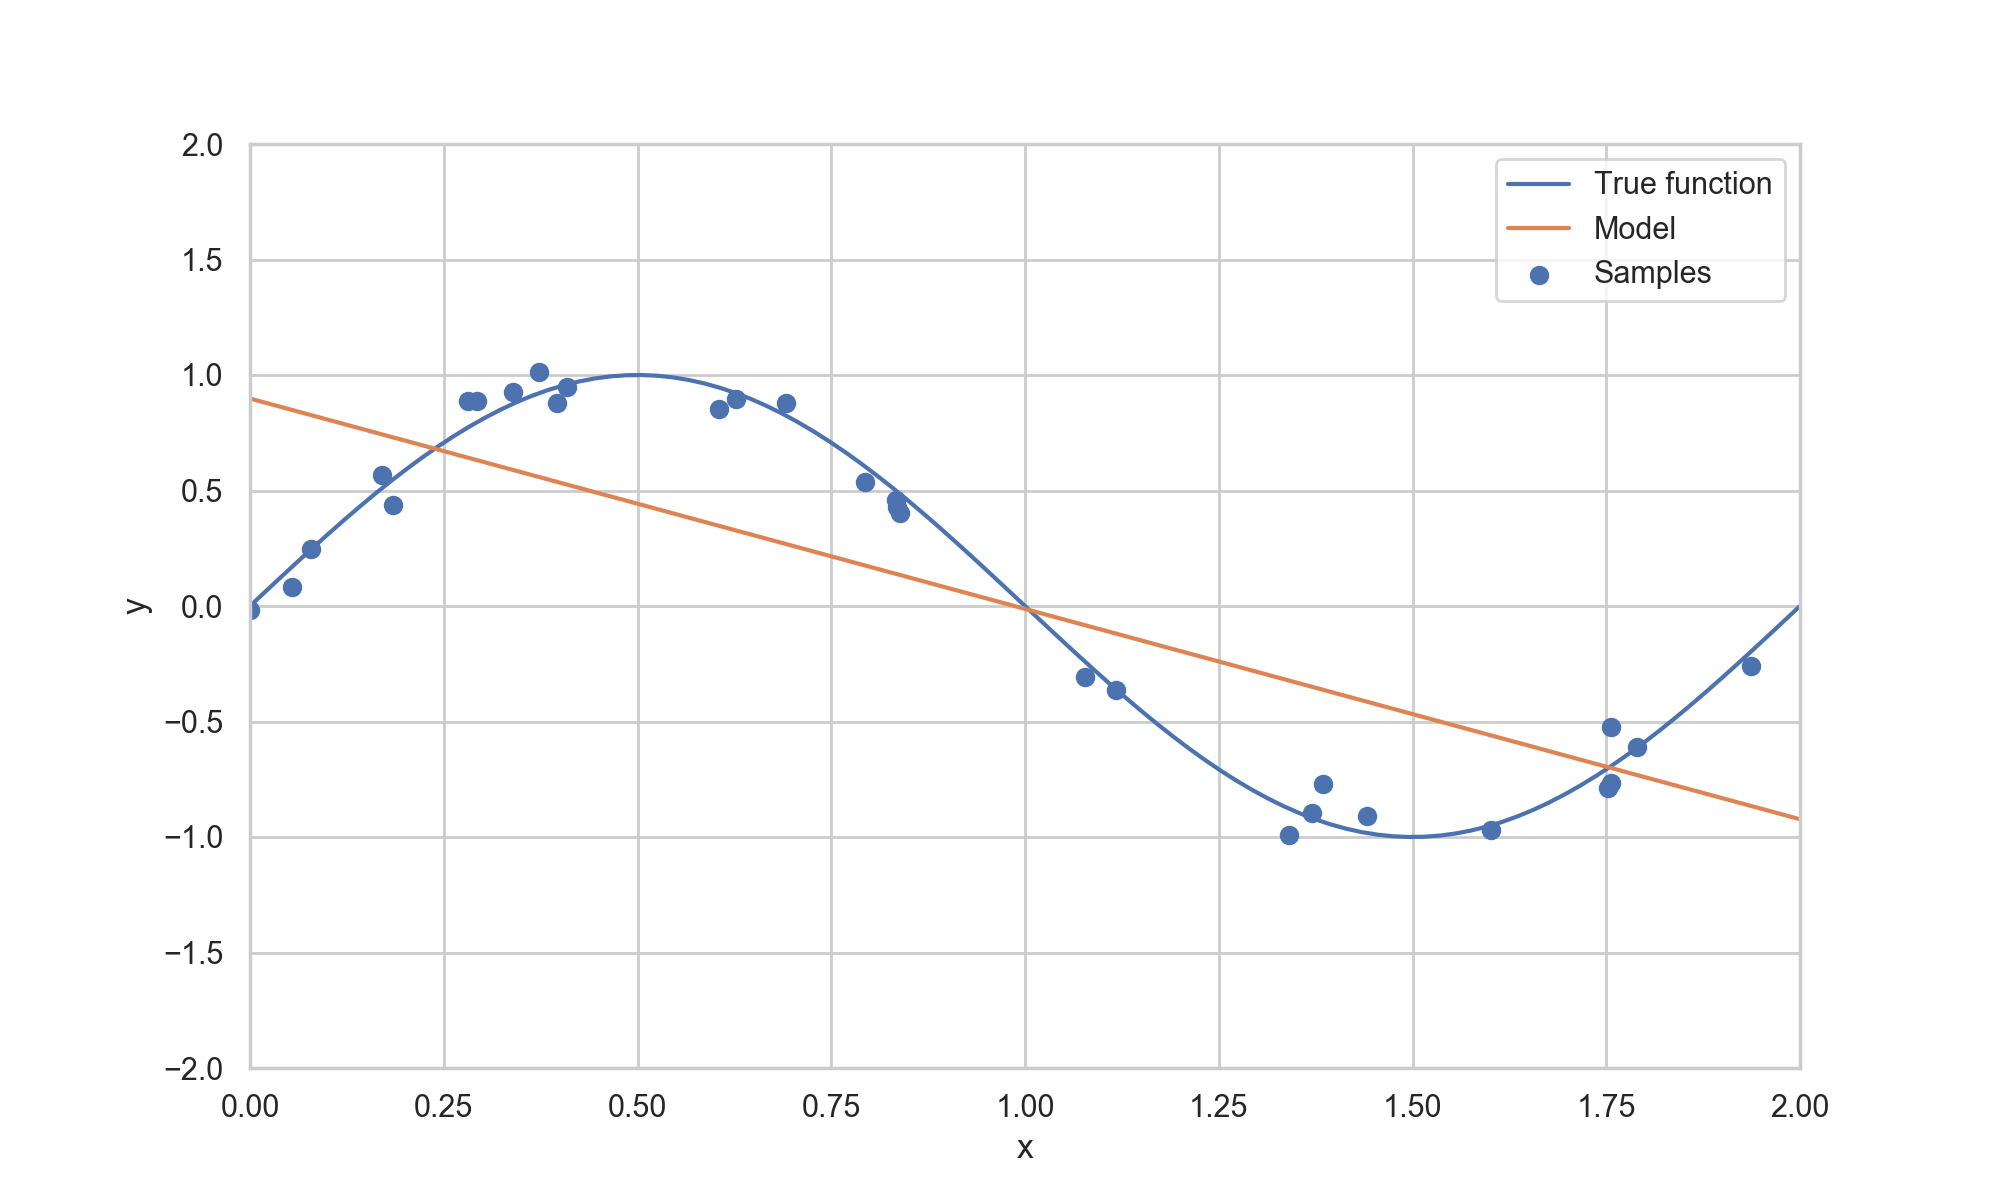

In [2]:
%matplotlib notebook
plt.figure(figsize=[10, 6])
def plot_fit(degree=1, seed=1):
    plt.cla()
    n_samples = 30

    np.random.seed(seed)
    true_fun = lambda X: np.sin(np.pi * X)
    X = np.sort(np.random.uniform(high=2, size=n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    X_test = np.linspace(0, 2, 100)
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 2))
    plt.ylim((-2, 2))
    plt.legend(loc=1)
    plt.show()


In [3]:
interact(plot_fit, degree=(1, 30, 1), seed=(1, 10, 1));

interactive(children=(IntSlider(value=1, description='degree', max=30, min=1), IntSlider(value=1, description=…

# How changing the regularization strength $\lambda$ corresponds to the bias-variance tradeoff

### What to talk about
* Bias variance tradeoff caused by higher/lower regularization strength

<IPython.core.display.Javascript object>


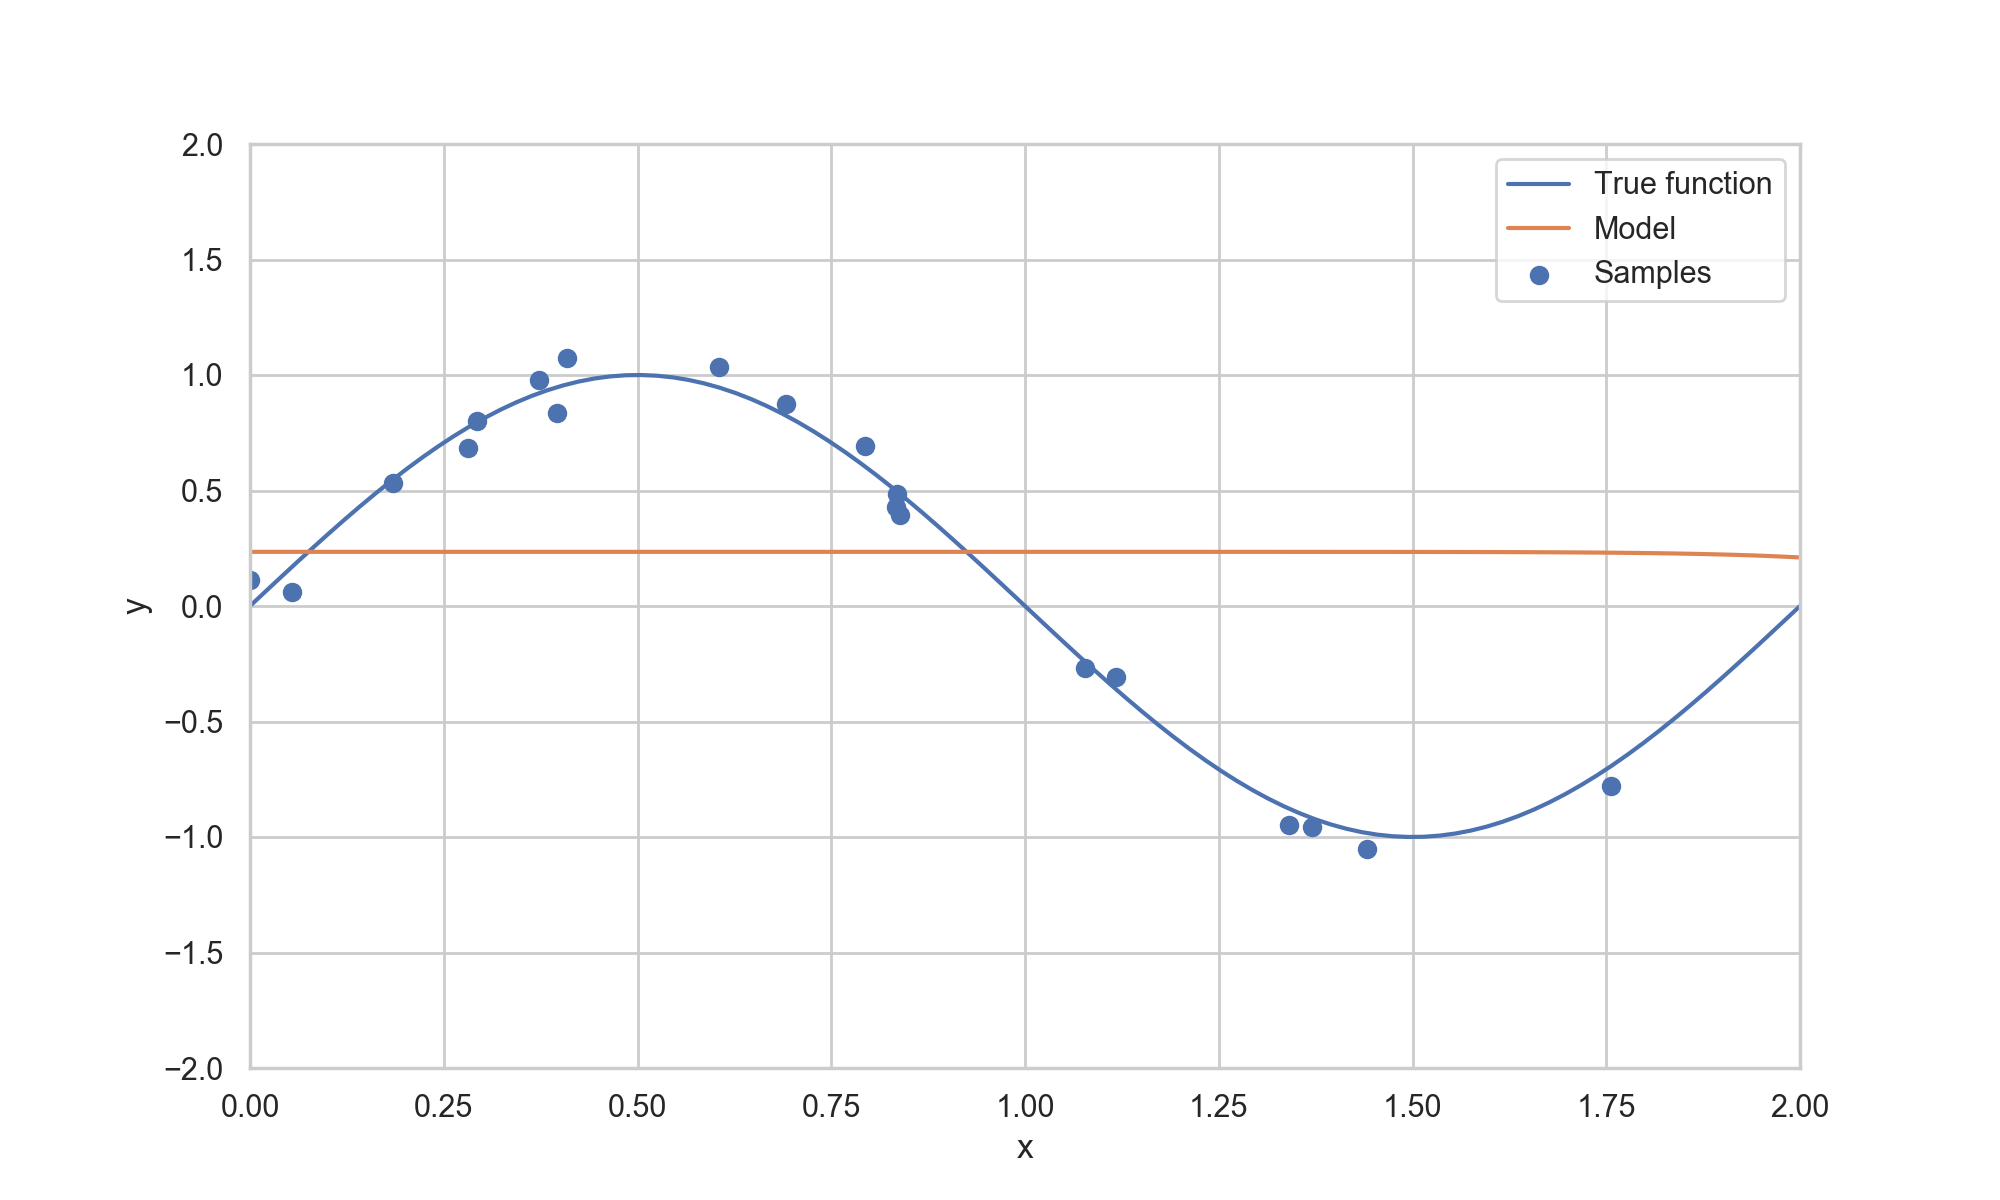

In [4]:
%matplotlib notebook
plt.figure(figsize=[10, 6])
def ridge_polynomial(log_lambda=0, seed=1):
    plt.cla()
    n_samples = 20

    true_fun = lambda X: np.sin(np.pi * X)
    np.random.seed(seed)
    X = np.sort(np.random.uniform(high=2, size=n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    

    polynomial_features = PolynomialFeatures(degree=15, include_bias=False)
    linear_regression = Ridge(alpha=np.power(10, log_lambda))
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    X_test = np.linspace(0, 2, 100)
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 2))
    plt.ylim((-2, 2))
    plt.legend(loc=1)
    plt.show()


In [5]:
interact(ridge_polynomial, log_lambda=(-15, 10, 1.0), seed=(1, 10, 1));

interactive(children=(FloatSlider(value=0.0, description='log_lambda', max=10.0, min=-15.0, step=1.0), IntSlid…

# Shrinkage with $L_2$ (ridge) and $L_1$ (lasso) regularization

### What to talk about
* Other types of regularization are possible, not necessarily $L_2$, any $L_p$ norm for $p \geq 1$ can be used.
* Using $0 < p < 1$ leads to nonconvex objective.
* Using $L_0$ pseudonorm is impossible to optimize with tools discussed in this course, this is called *Compressed sensing* -> entire research discipline.
* $L_2$ is called **Ridge** leads to smaller values of $\mathbf{w}$ overall, but no entries are equal to 0. Also easier to optimize.
* $L_1$ is called **Lasso**, leads to sparse $\mathbf{w}$ (lots of entries are equal to 0)
* You can combine both penalties -> Elastic net
* http://www.ds100.org/sp17/assets/notebooks/linear_regression/norm_balls.png
* There exist other regularization schemes, doesn't have to be weight penalty. In general, regularization - decreasing model capacity / increasing bias / reducing variance.

In [6]:
data = load_boston()
X = data['data']
y = data['target']
names = data['feature_names']

/opt/anaconda3/envs/i2dl/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

In [7]:
lambdas = np.logspace(-4, 4, num=100)
# Ridge regression
coefs_ridge = []
for a in lambdas:
    ridge = ElasticNet(alpha=a, l1_ratio=0)
    ridge.fit(X, y)
    coefs_ridge.append(ridge.coef_)
coefs_ridge = np.array(coefs_ridge)

# Lasso
coefs_lasso = []
for a in lambdas:
    lasso = ElasticNet(alpha=a, l1_ratio=1)
    lasso.fit(X, y)
    coefs_lasso.append(lasso.coef_)
coefs_lasso = np.array(coefs_lasso)

/opt/anaconda3/envs/i2dl/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.548e+03, tolerance: 4.272e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/anaconda3/envs/i2dl/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.549e+03, tolerance: 4.272e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using on

/opt/anaconda3/envs/i2dl/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.252e+03, tolerance: 4.272e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/anaconda3/envs/i2dl/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.319e+03, tolerance: 4.272e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using on

/opt/anaconda3/envs/i2dl/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.469e+04, tolerance: 4.272e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/anaconda3/envs/i2dl/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.485e+04, tolerance: 4.272e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using on

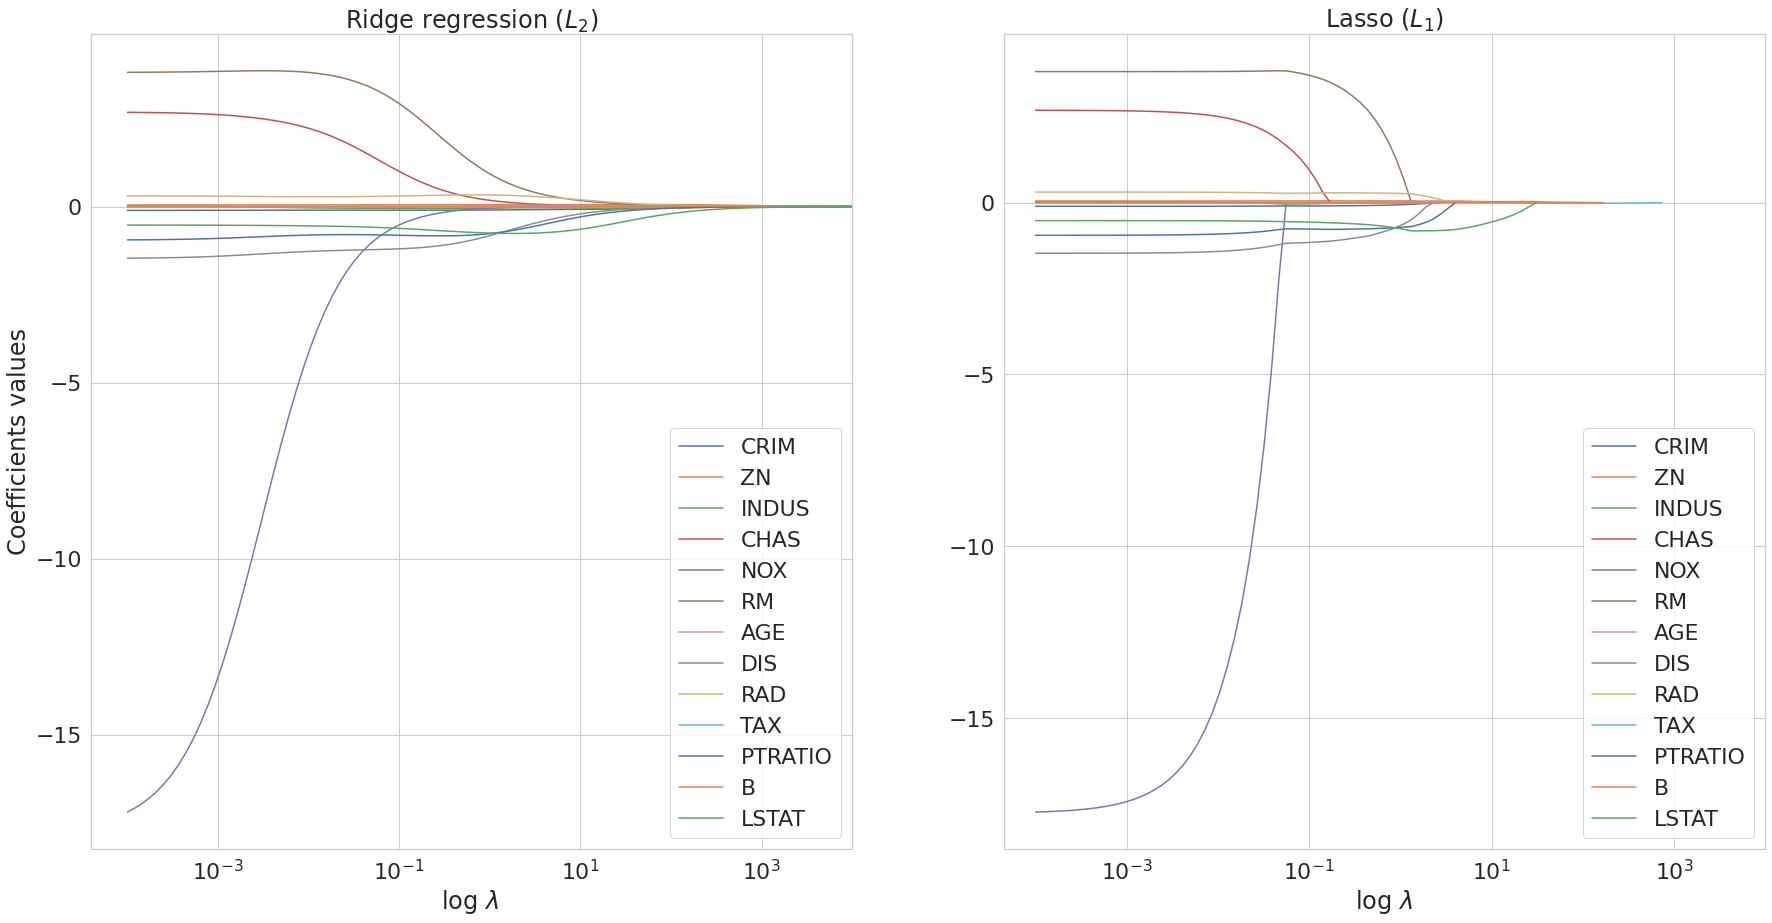

In [8]:
%matplotlib inline
sns.set(font_scale=2, style='whitegrid')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[30, 15])
# Plot ridge
for i in range(13):
    mask = coefs_ridge[:, i] != 0
    ax1.semilogx(lambdas[mask], coefs_ridge[:, i][mask], label=names[i])
ax1.set_xlabel('log $\lambda$ ')
ax1.set_ylabel('Coefficients values')
ax1.set_title('Ridge regression ($L_2$)')
ax1.set_xlim(right=1e4)
ax1.legend()

# Plot lasso
for i in range(13):
    # don't plot the parts where the coefficient is equal to 0
    mask = coefs_lasso[:, i] != 0
    mask[np.where(~mask)[0][0]] = True  
    ax2.semilogx(lambdas[mask], coefs_lasso[:, i][mask], label=names[i])
ax2.set_xlabel('log $\lambda$ ')
ax2.set_title('Lasso ($L_1$)')
ax2.set_xlim(right=1e4)
ax2.legend()
plt.show()

### Interpretation of the plots
The plots show how values of model weights change as regularization scale increases.

In the plots we confirm these facts:
* $L_2$ leads to smaller values of $\mathbf{w}$ overall, but no entries are equal to 0.
* $L_1$ leads to sparse $\mathbf{w}$ (lots of entries are equal to 0 as log lambda increases).
* More on weights regularization in Section 3.4 of https://web.stanford.edu/~hastie/Papers/ESLII.pdf